# Time Series Forecasting of Future Sales Using ARIMA and SARIMA

Rafiq Islam  
2024-11-08

# Library and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [2]:
df = pd.read_csv('data/Perrin Freres monthly champagne sales millions.csv')
df.head()

In [3]:
df.tail()

## Data Cleaning and Preprocessing

In [4]:
df.columns = ['Month', 'Sales']
df = df.drop(df.index[-2:])
df.tail()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB

Since the column, month is a string object, so we need to convert it
into date and time format in order to apply time series models

In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

Now looking at the data, we see that it’s a monthly sales data. So we
set the month as our index, instead of the regular index.

In [7]:
df.set_index('Month', inplace=True)
df.head()

## Visualize the data

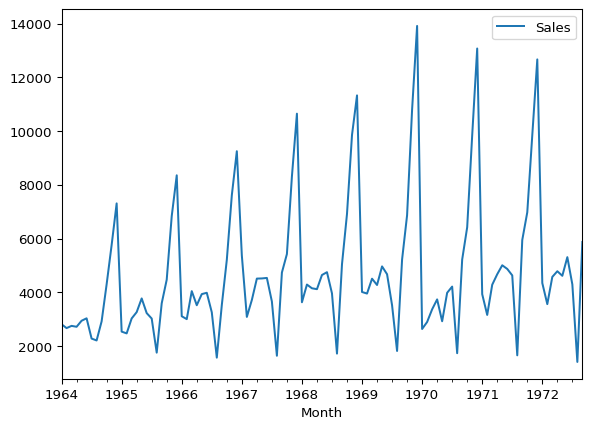

In [8]:
df.plot()

From the plot we see that there is some seasonality in the data which
needs to be taken care off. Let’s first check the stationarity of the
data. Stationarity means the statistical properites such as mean,
variance remains the same over the time for a time series data. We
define the null and alternative hypothesis like this

-   $H_0$: The data is not stationary  
-   $H_1$: The data is stationary

In [9]:
from statsmodels.tsa.stattools import adfuller

def adfuler_test(sales):
    adf_test = adfuller(sales)
    labels = ['ADF Test Statistic','p-value', 'Number of observation used']
    for value,label in zip(adf_test, labels):
        print(label+' : '+str(value))
    if adf_test[1] <= 0.05:
        print("Strong Evidence against the null hypothesis (H0), so reject the null hypothesis")
    else:
        print("There is not enough evidence against the null hypothesis, so we accept the alternative")
adfuler_test(df['Sales'])

ADF Test Statistic : -1.8335930563276166
p-value : 0.36391577166024813
Number of observation used : 11
There is not enough evidence against the null hypothesis, so we accept the alternative